In [22]:
import numpy as np
import os
import time

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import cv2

In [24]:
import h5py
 
def load_dataset():
    train_dataset = h5py.File('cats_and_dogs/train_catvnoncat.h5', "r")
    train_X = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_Y = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('cats_and_dogs/test_catvnoncat.h5', "r")
    test_X = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_Y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    
    return train_X, train_Y, test_X, test_Y, classes

In [25]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

y = [1], it's a 'cat' picture.


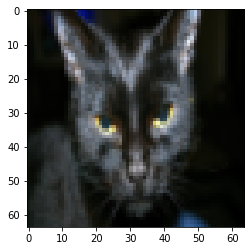

In [26]:
# Example of a picture
index = 25
plt.imshow(X_train[index])
print ("y = " + str(Y_train[:, index]) + ", it's a '" + classes[np.squeeze(Y_train[:, index])].decode("utf-8") +  "' picture.")

In [27]:
X_trainf = X_train.reshape(X_train.shape[0], -1).T
X_testf =  X_test.reshape(X_test.shape[0], -1).T

In [28]:
X_trainf = X_trainf / 255.
X_testf = X_testf / 255.

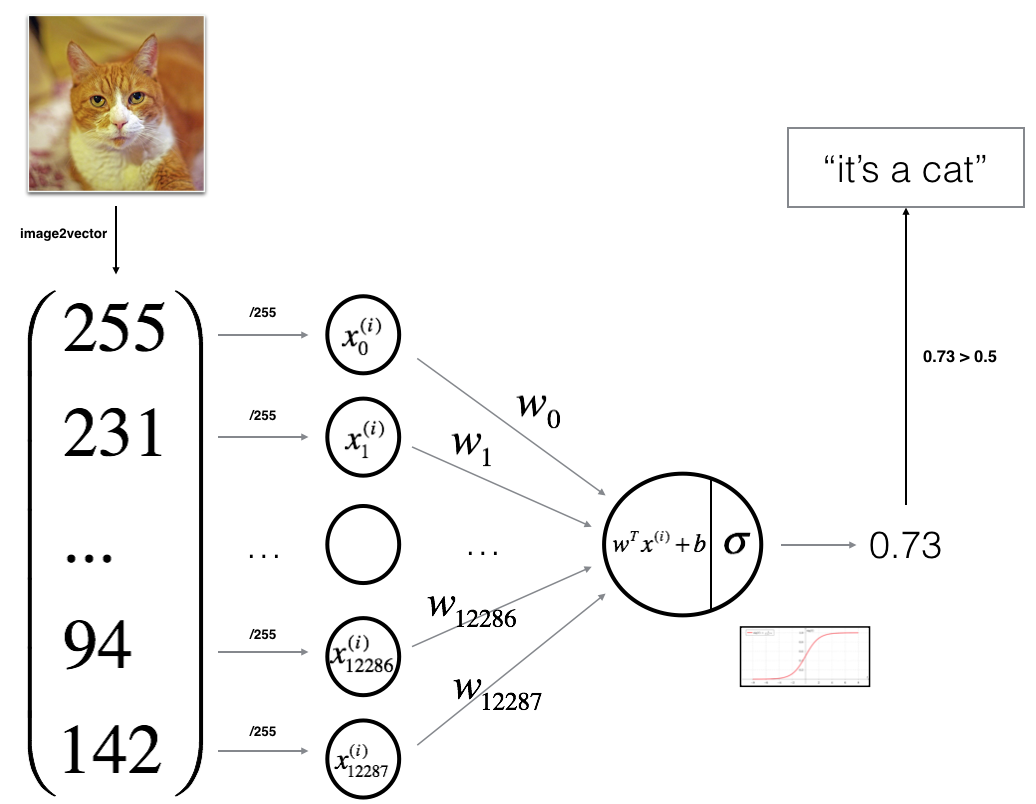

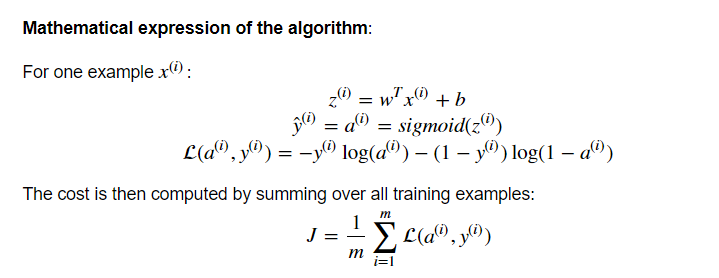

In [29]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [35]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [30]:
def init_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w,b

In [37]:
dim = 2
w, b = init_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


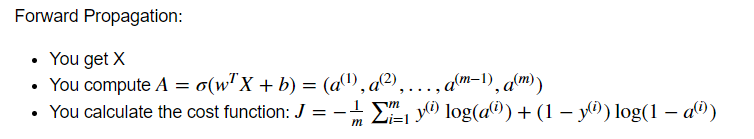

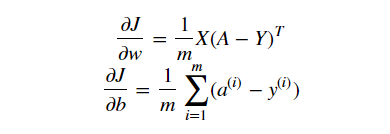

In [31]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    J = (- 1/m) * np.sum((Y * np.log(A)) + (1-Y)*np.log(1 - A))
    
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    J = np.squeeze(J)
    grads = {"dw":dw, "db":db}
    
    return grads, J

In [32]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [96]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    # This function optimizers w and b by running a gradient descent algorithm
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
#             print("Iteration {}, cost {}".format(i, cost))
        
    params = {"w": w, "b": b}
    grads = {"dw":dw, "db": db}

    return params, grads, costs

In [45]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = optimize(w, b, X, Y, 100, 0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Iteration 0, cost 5.801545319394553
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [50]:
def predict(w, b, X):
    # Predicts whether the label is 0 or 1 using logistic regression params
    # which has just been learnt
    
    m = X.shape[1]
    Y_predictions = np.zeros((1, m))
    w = w.reshape((X.shape[0], 1))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            Y_predictions[0, i] = 1
        else:
            Y_predictions[0, i] = 0
            
    return Y_predictions

In [51]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [73]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2_000, learning_rate = 0.001):
    w, b = init_zeros(X_train.shape[0])
    
    params, grads, cost = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
    
    Y_train_preds = predict(w, b, X_train)
    Y_test_preds = predict(w, b, X_test)
    
    print("Train Error: {}".format(100 - np.mean(np.abs(Y_train_preds - Y_train))*100))
    print("Test Error: {}".format(100 - np.mean(np.abs(Y_test_preds - Y_test))*100))     
    
    d = {
        "cost":cost,
        "Y_train_preds":Y_train_preds,
        "Y_test_preds":Y_test_preds,
        "w":w,
        "b":b,
        "learning_rate":learning_rate,
        "num_iterations":num_iterations
    }
    
    return d

In [74]:
d = model(X_trainf, Y_train, X_testf, Y_test, 2000, 0.005)

Iteration 0, cost 0.6931471805599453
Iteration 100, cost 0.5845083636993086
Iteration 200, cost 0.46694904094655476
Iteration 300, cost 0.37600686694802077
Iteration 400, cost 0.3314632893282513
Iteration 500, cost 0.30327306747438293
Iteration 600, cost 0.2798795865826048
Iteration 700, cost 0.26004213692587574
Iteration 800, cost 0.24294068467796623
Iteration 900, cost 0.22800422256726066
Iteration 1000, cost 0.21481951378449635
Iteration 1100, cost 0.20307819060644985
Iteration 1200, cost 0.1925442771670686
Iteration 1300, cost 0.18303333796883503
Iteration 1400, cost 0.17439859438448876
Iteration 1500, cost 0.16652139705400335
Iteration 1600, cost 0.15930451829756614
Iteration 1700, cost 0.15266732471296504
Iteration 1800, cost 0.1465422350398234
Iteration 1900, cost 0.14087207570310162
Train Error: 99.04306220095694
Test Error: 70.0


R:\Work\Anacond\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [84]:
d["Y_test_preds"]

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0.]])

b'cat'

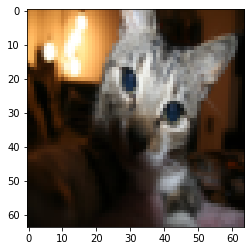

In [91]:
# Example of a picture that was wrongly classified.
index = 40
plt.imshow(X_test[:,index].reshape((64, 64, 3)))
classes[d["Y_test_preds"][0, index].astype(int)]

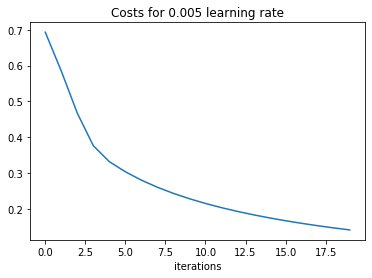

In [95]:
costs = np.squeeze(d['cost'])
plt.plot(costs)
plt.title("Costs for {} learning rate".format(d["learning_rate"]))
plt.xlabel("iterations")
plt.show()

R:\Work\Anacond\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Train Error: 99.52153110047847
Test Error: 70.0



Train Error: 88.99521531100478
Test Error: 66.0



Train Error: 68.42105263157895
Test Error: 36.0





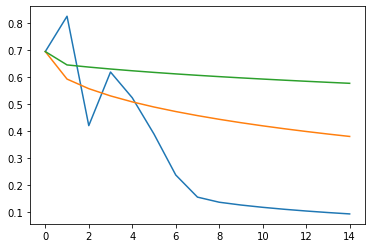

In [101]:
LEARNING_RATES = [0.01, 0.001, 0.0001]
models = {}
for lr in LEARNING_RATES:
    m = model(X_trainf, Y_train, X_testf, Y_test, 1500, lr)
    models[LEARNING_RATES.index(lr)] = m
    print("\n\n")

for i in models.keys():
    cost = np.squeeze(models[i]["cost"])
    plt.plot(cost)
plt.show()